Attempting to find correlation between certain features?

In [1]:
# !pip install autograd
import pandas as pd
import autograd.numpy as np
from autograd import grad 

In [2]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

In [14]:
genre_histograms = {
    "edm":       np.asarray([1, 0, 0, 0, 0, 0, 0]),
    "hiphop":    np.asarray([0, 1, 0, 0, 0, 0, 0]),
    "classical": np.asarray([0, 0, 1, 0, 0, 0, 0]),
    "jazz":      np.asarray([0, 0, 0, 1, 0, 0, 0]),
    "pop":       np.asarray([0, 0, 0, 0, 1, 0, 0]),
    "country":   np.asarray([0, 0, 0, 0, 0, 1, 0]),
    "rock":      np.asarray([0, 0, 0, 0, 0, 0, 1])
}
print(np.unique(y))

['classical' 'country' 'edm' 'hiphop' 'jazz' 'pop' 'rock']


In [3]:
# Split test and training into x and y values
x_train = train_df[attribute_names]
y_train = train_df["Class"]
x_test = test_df[attribute_names]
y_test = test_df["Class"]

x = x_train
y = y_train
x = x.values
y = y.values

In [5]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
 
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))
def least_absolute(w):
    cost = np.sum(np.absolute(model(x,w) - y))
    return cost/float(np.size(y))

To do:
- plot each attribute against another attribute?

In [7]:
attribute_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

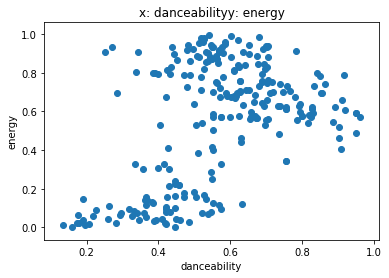

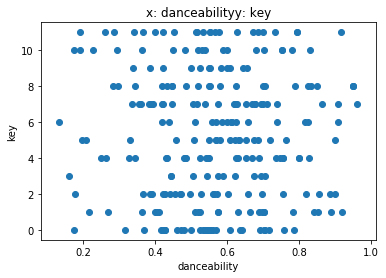

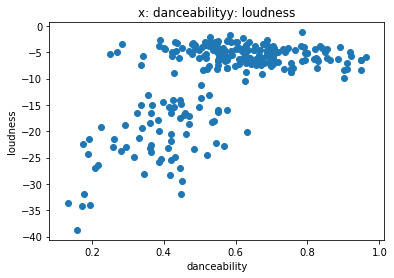

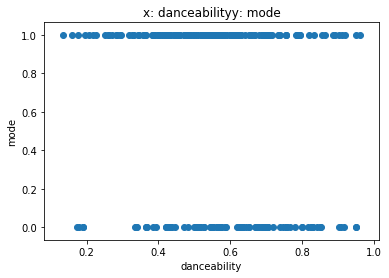

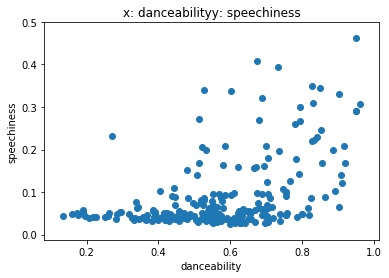

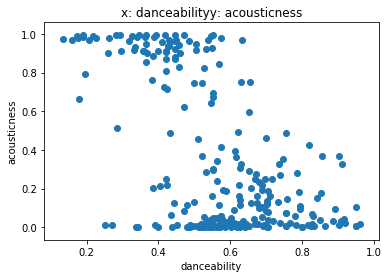

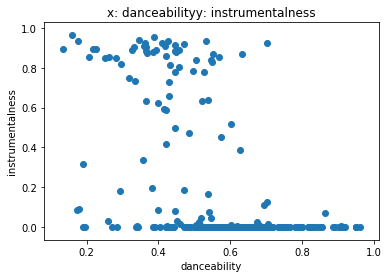

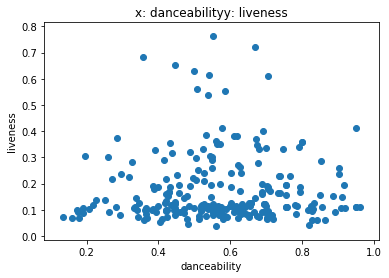

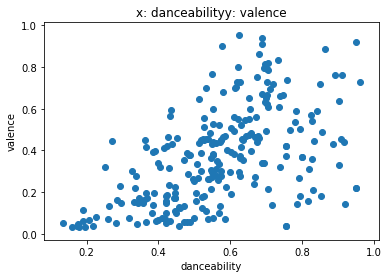

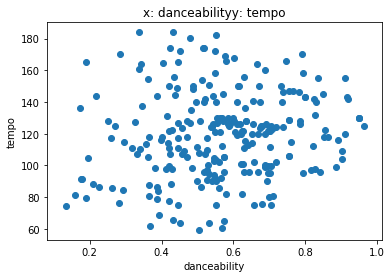

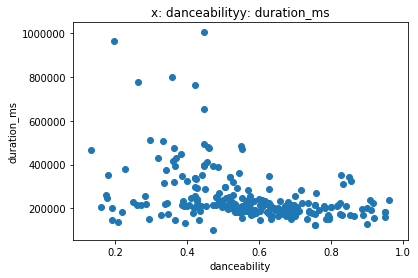

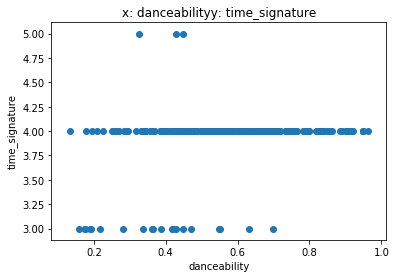

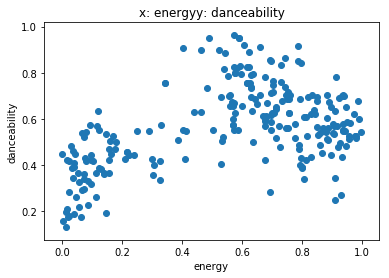

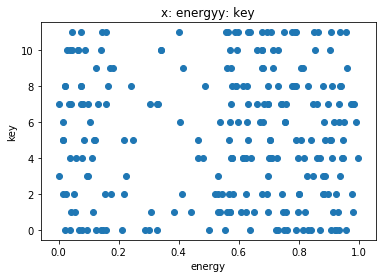

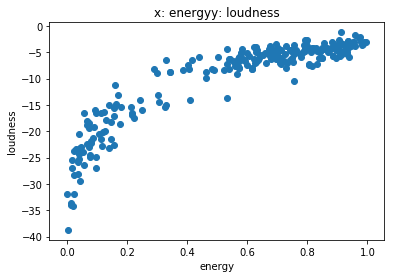

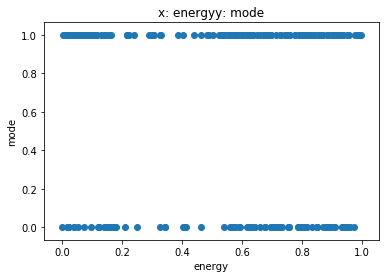

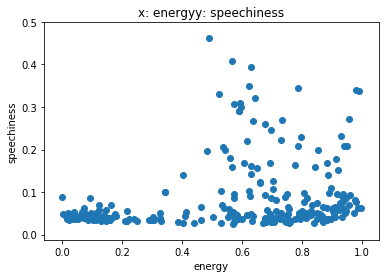

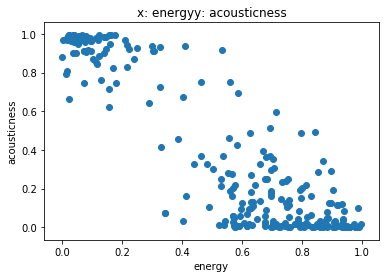

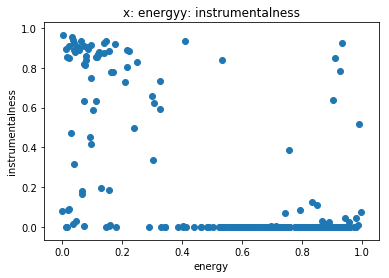

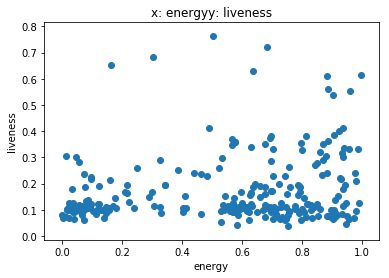

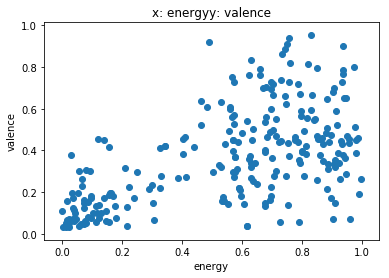

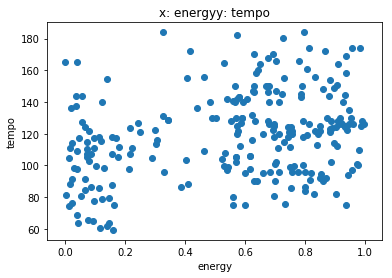

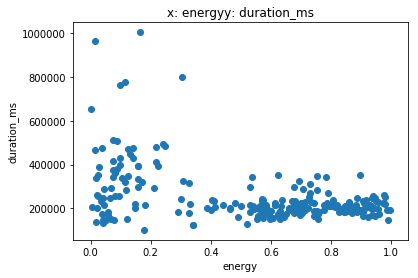

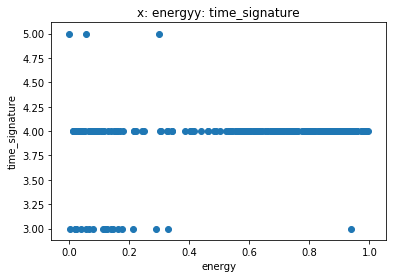

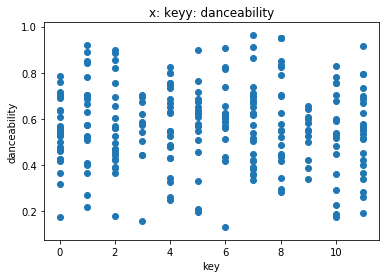

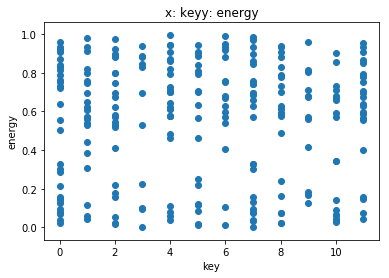

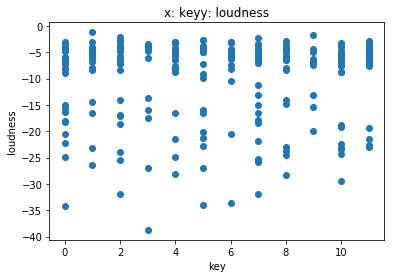

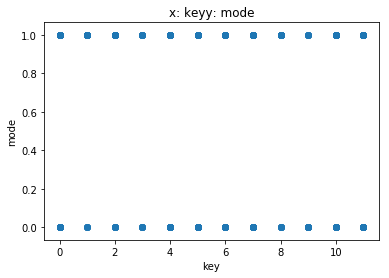

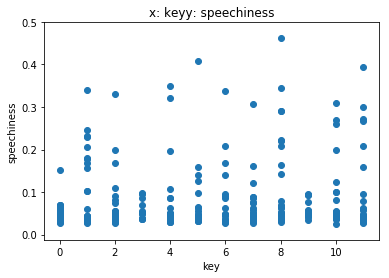

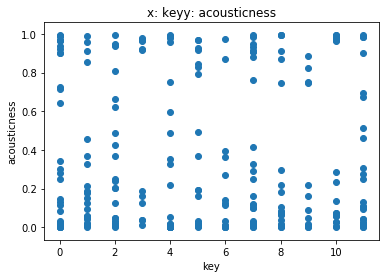

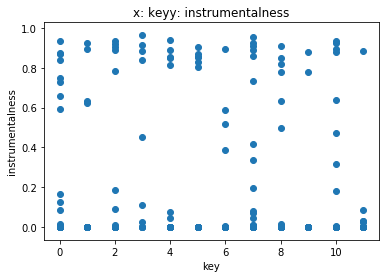

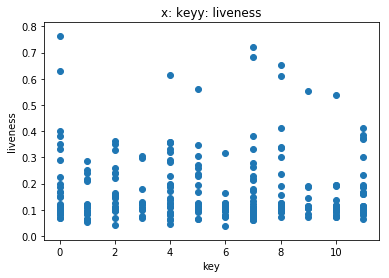

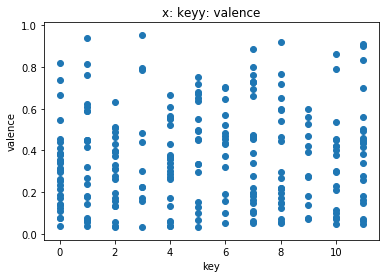

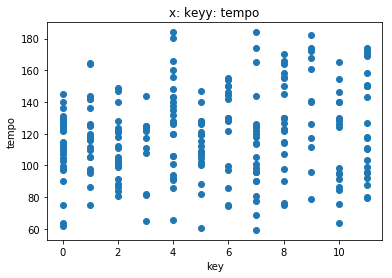

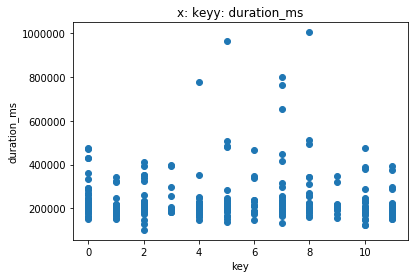

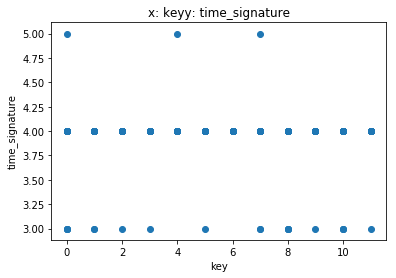

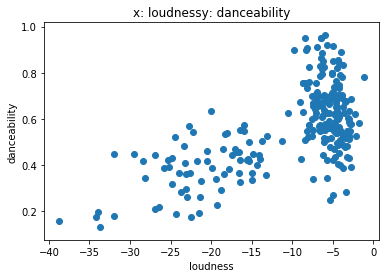

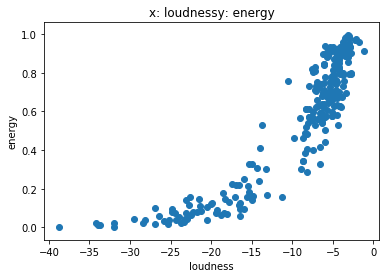

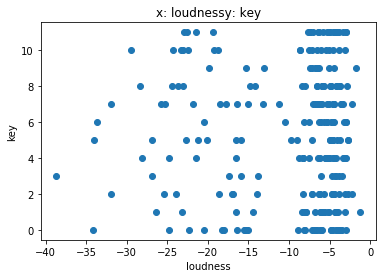

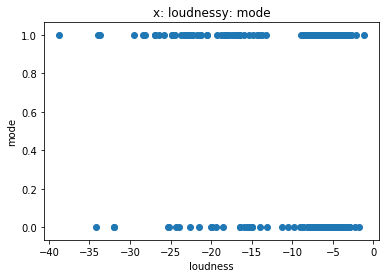

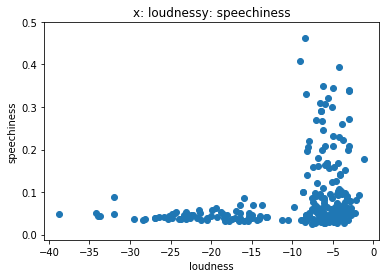

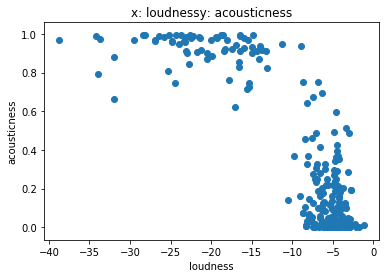

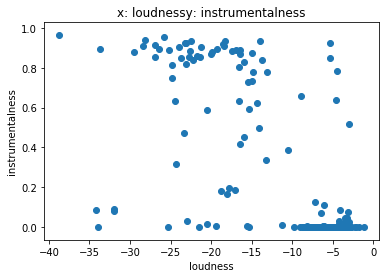

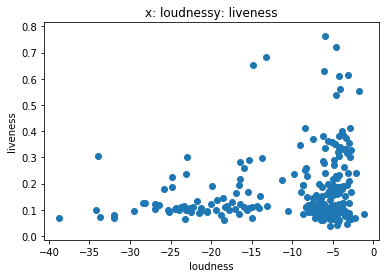

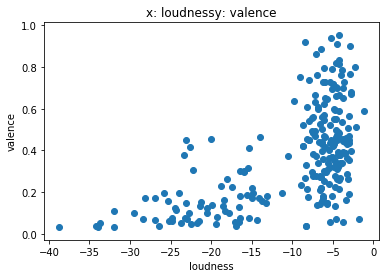

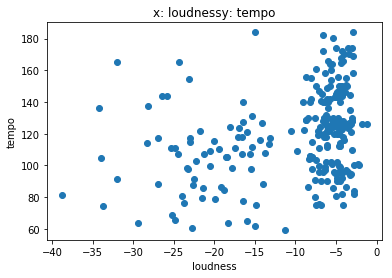

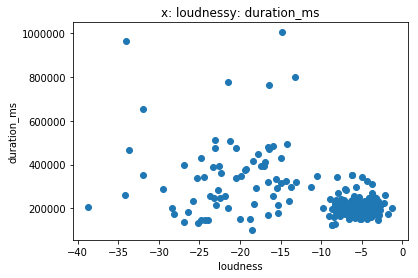

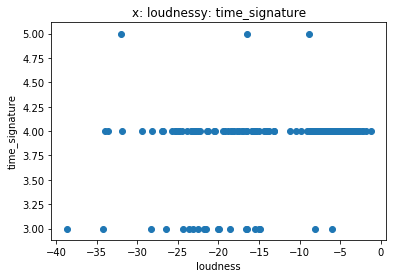

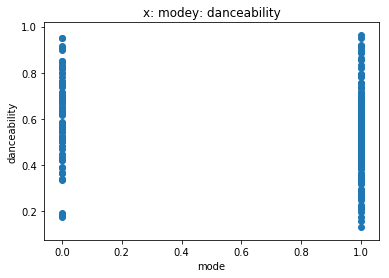

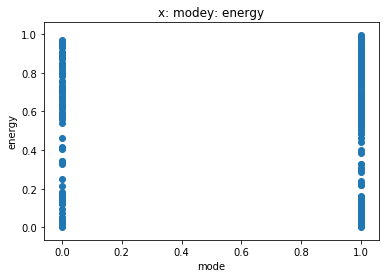

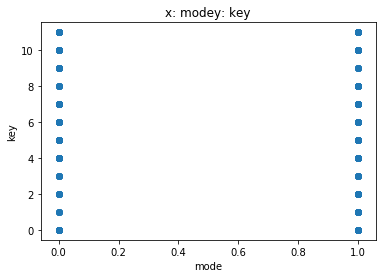

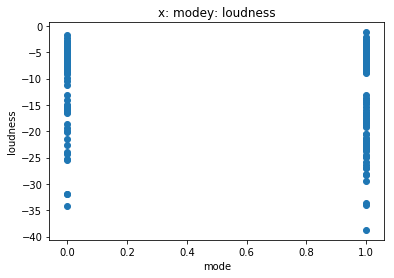

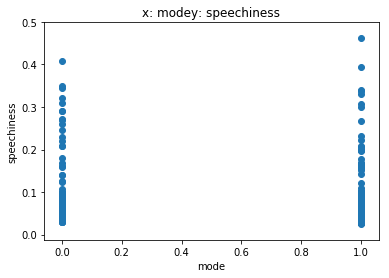

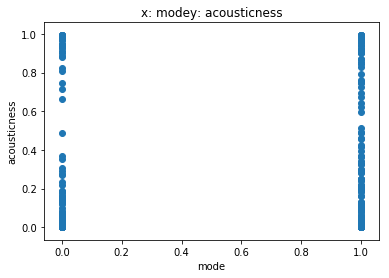

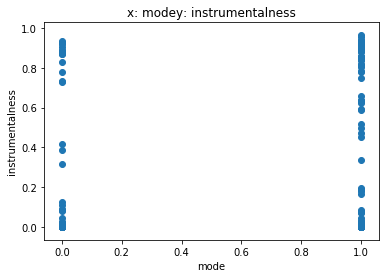

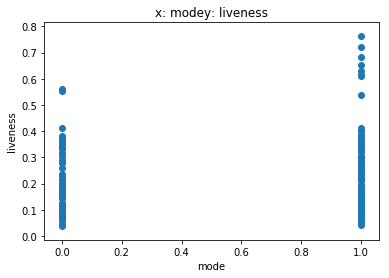

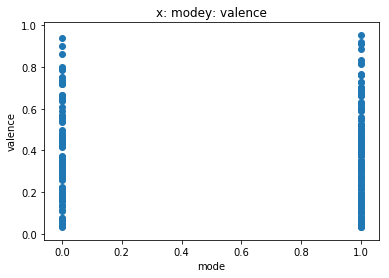

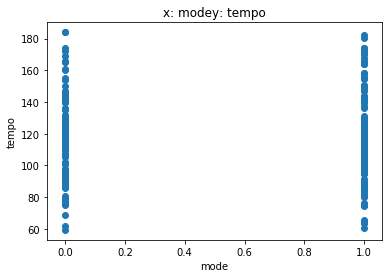

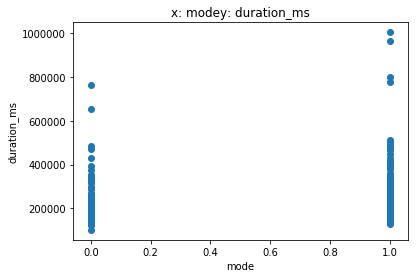

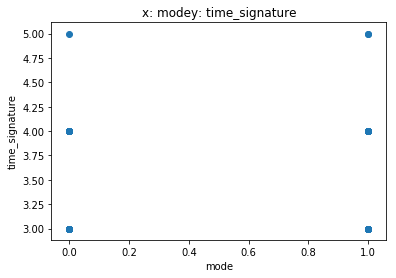

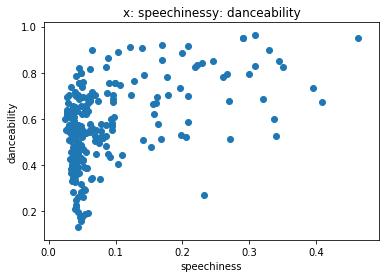

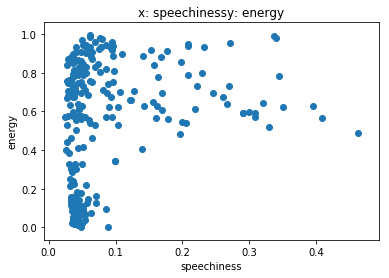

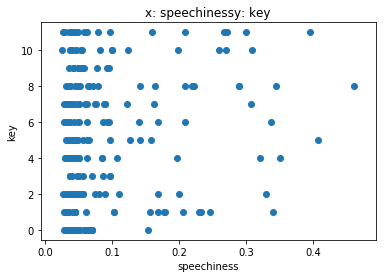

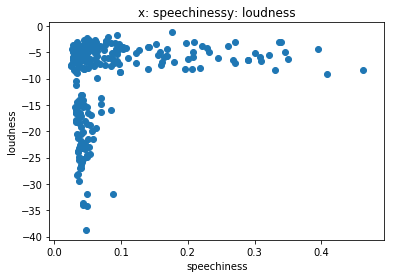

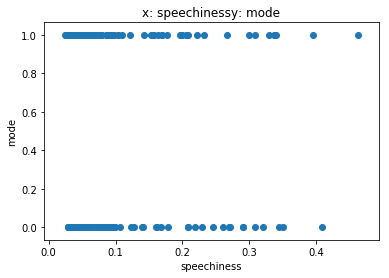

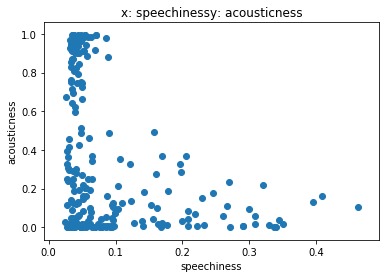

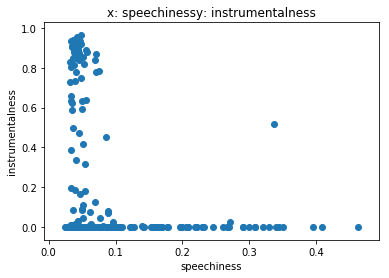

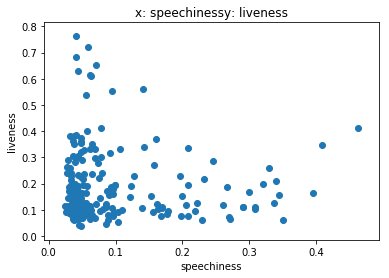

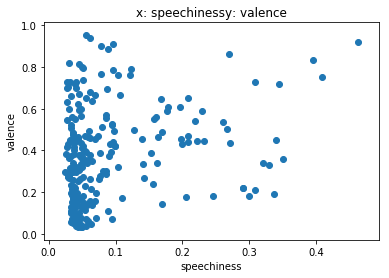

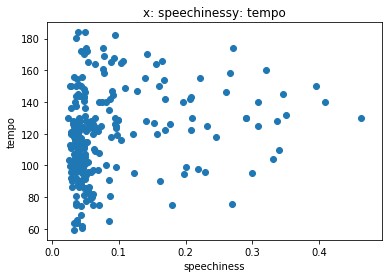

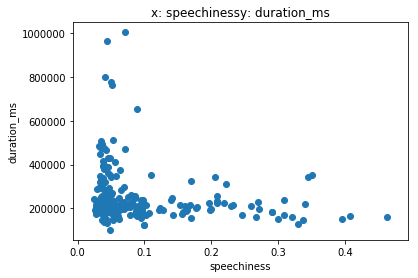

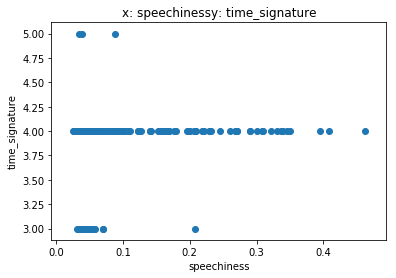

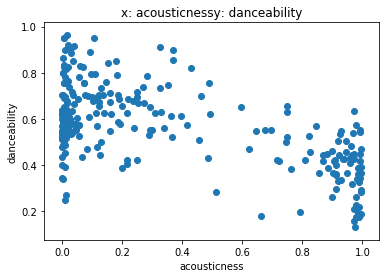

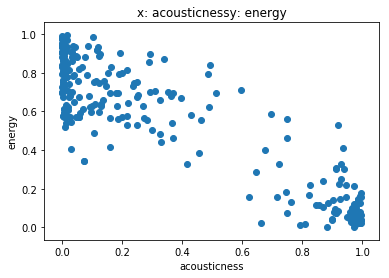

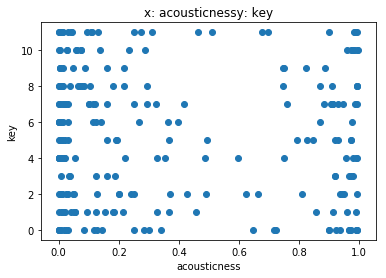

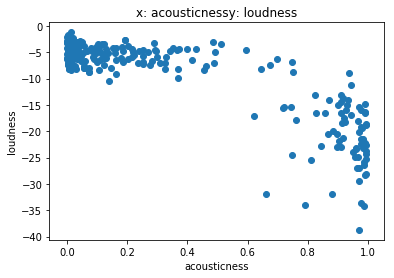

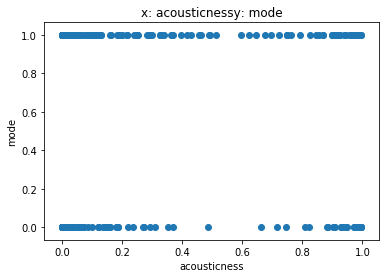

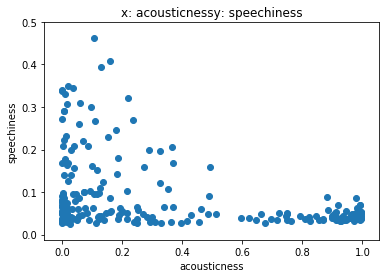

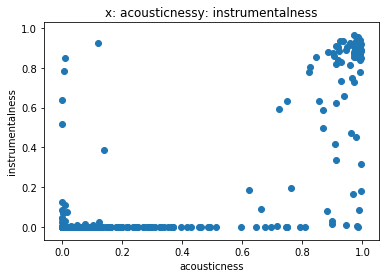

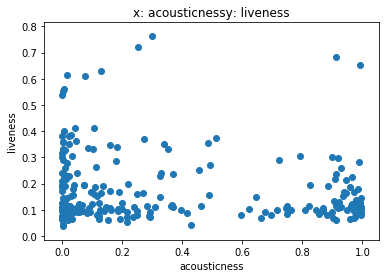

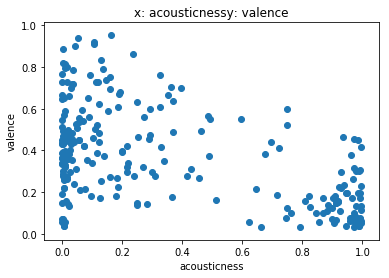

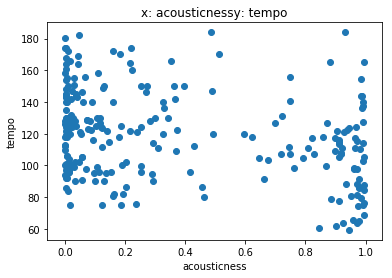

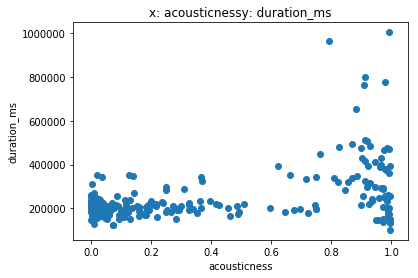

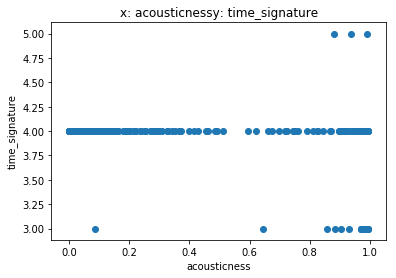

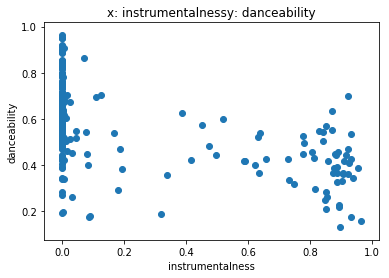

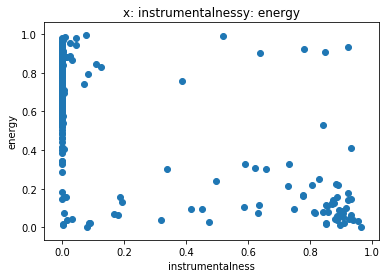

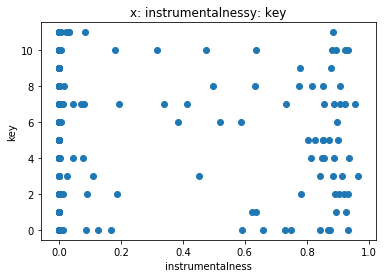

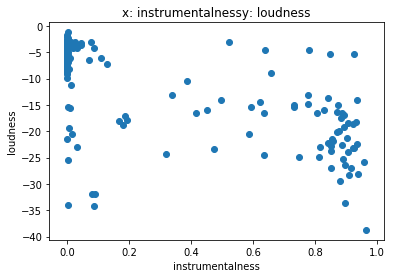

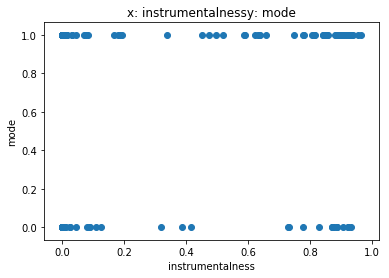

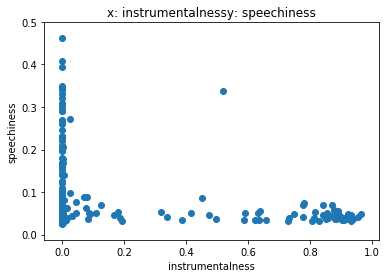

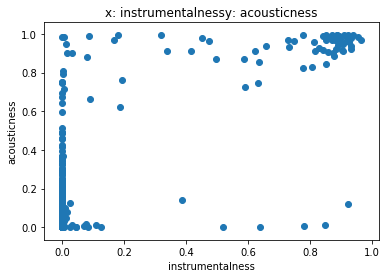

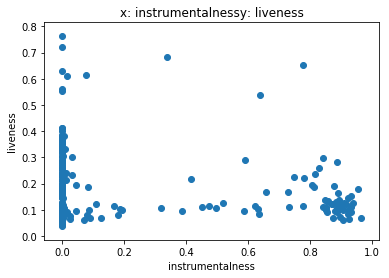

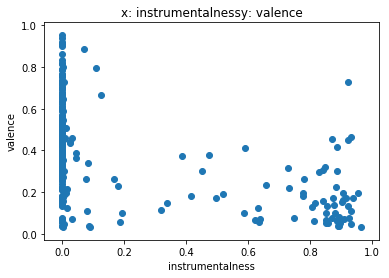

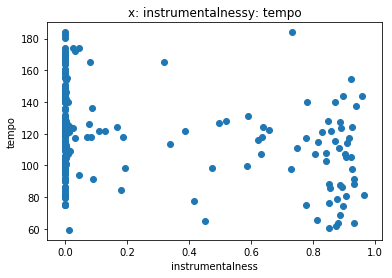

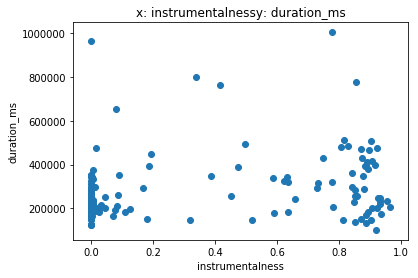

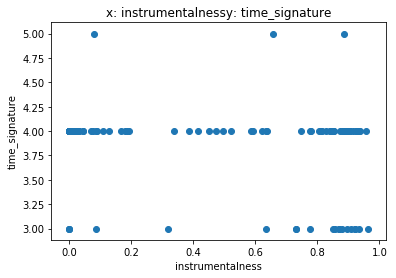

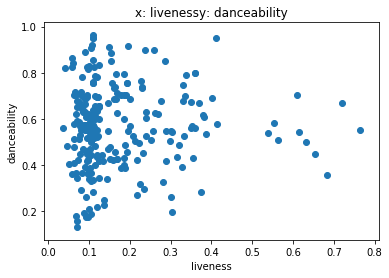

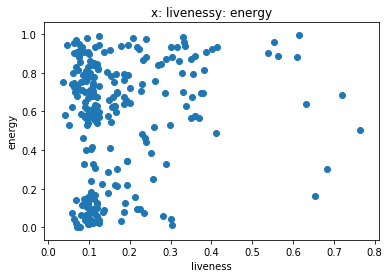

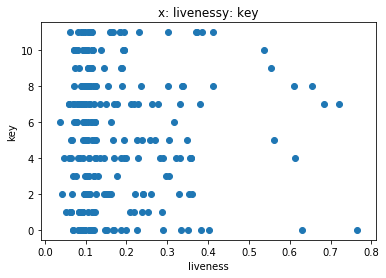

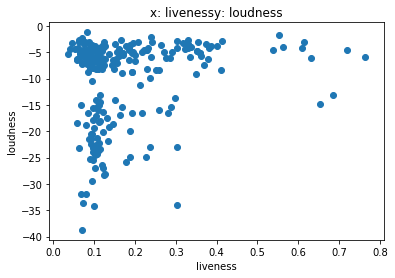

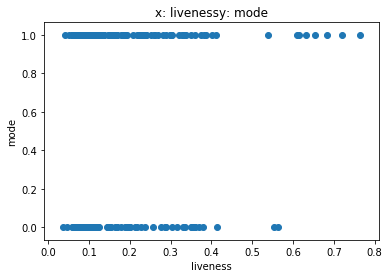

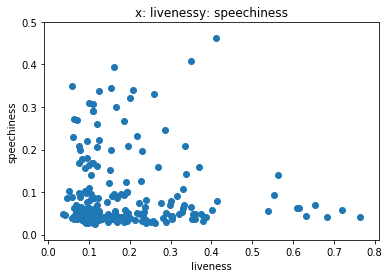

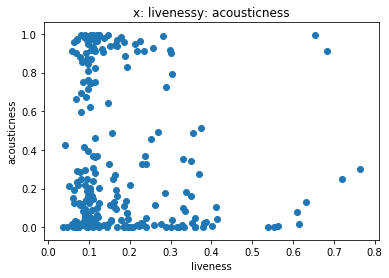

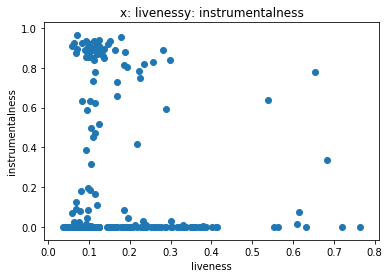

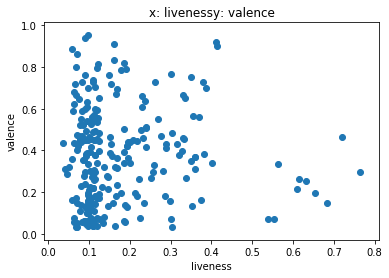

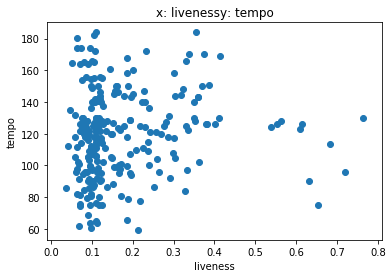

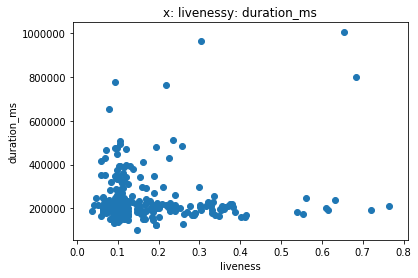

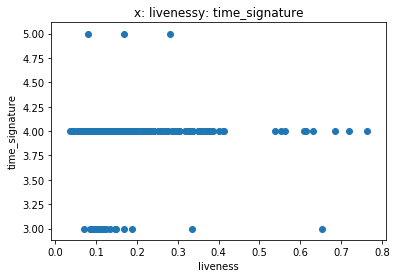

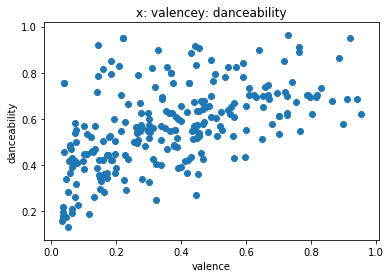

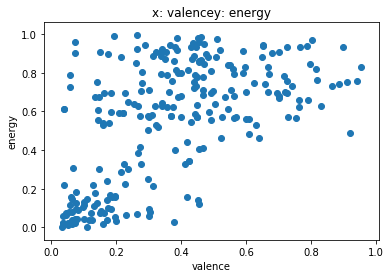

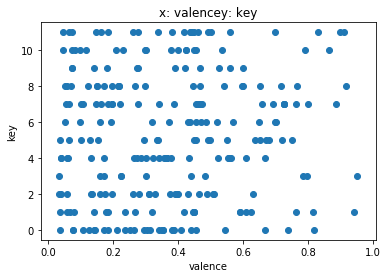

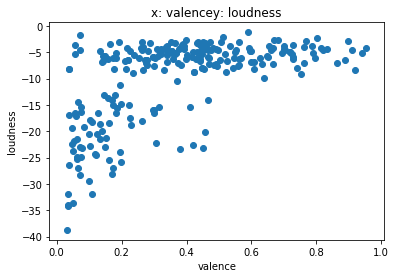

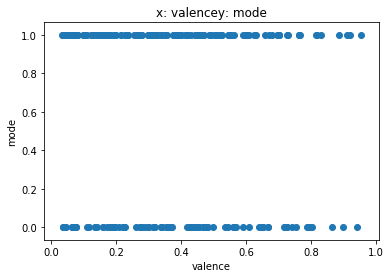

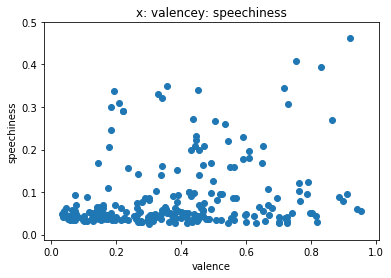

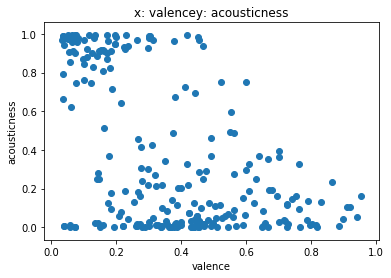

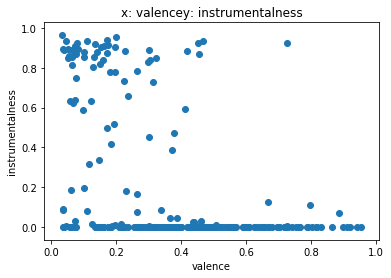

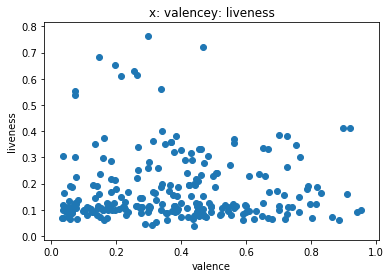

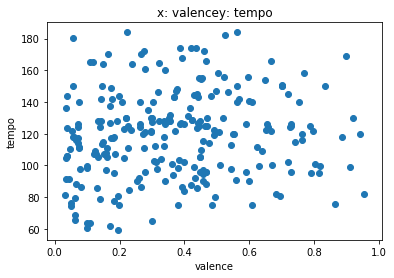

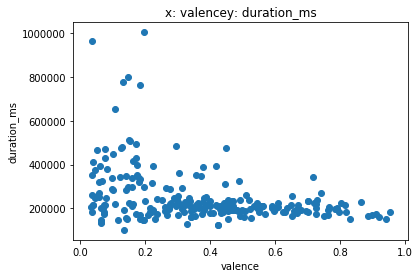

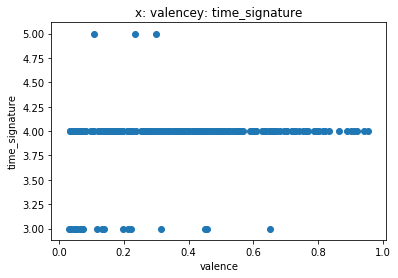

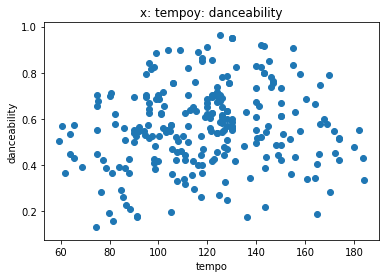

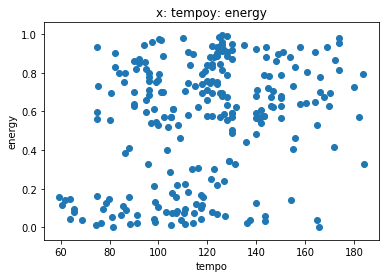

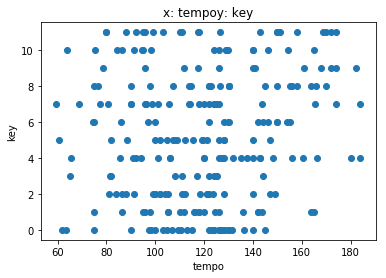

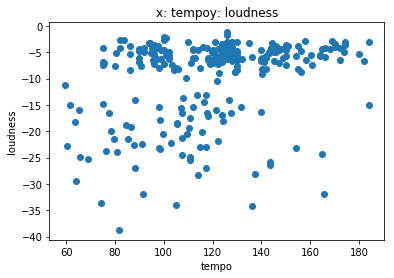

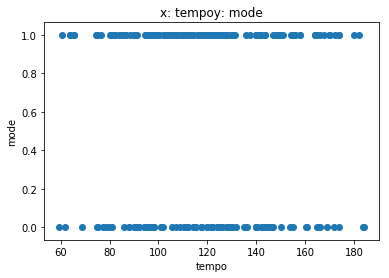

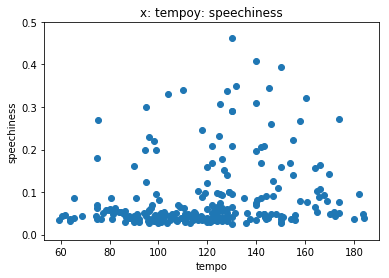

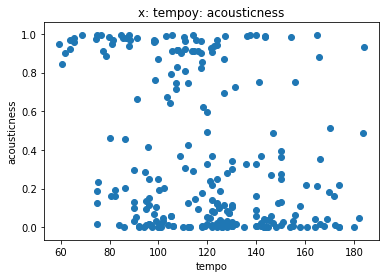

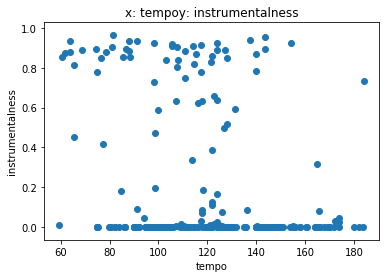

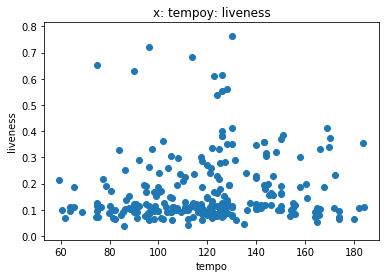

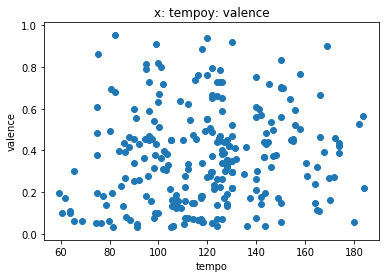

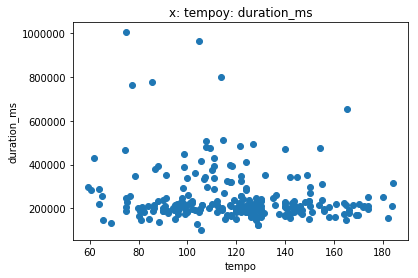

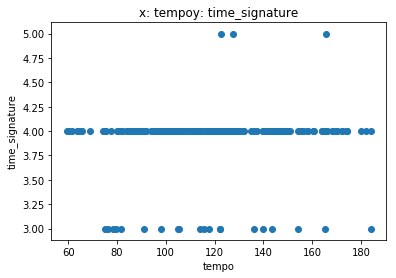

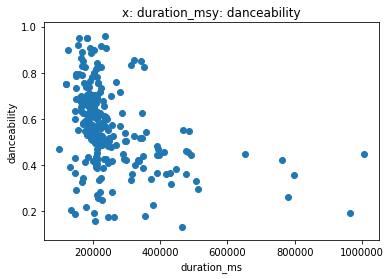

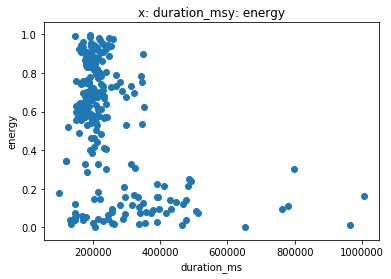

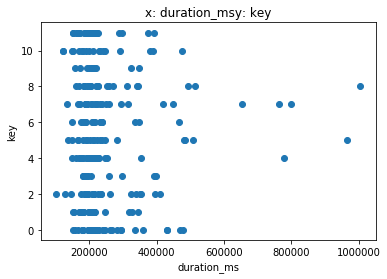

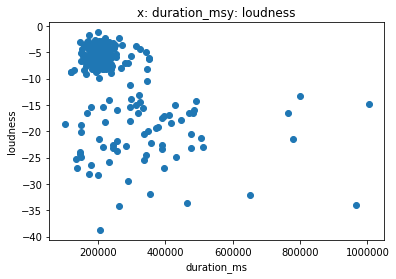

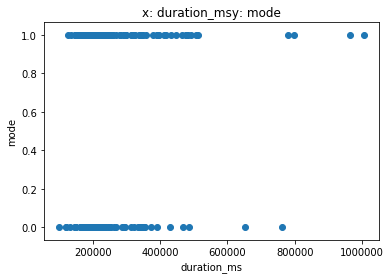

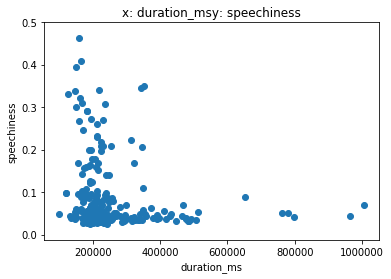

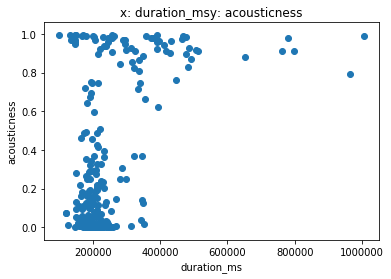

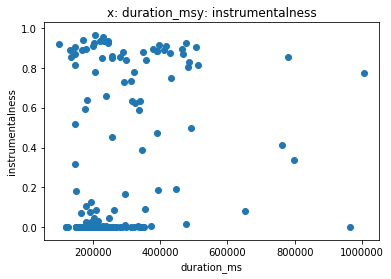

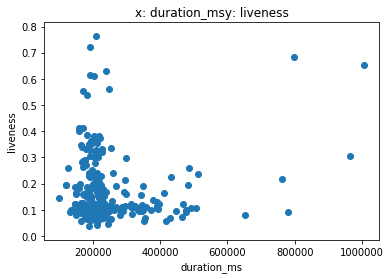

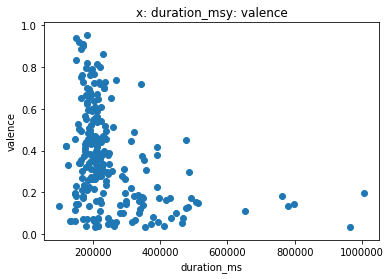

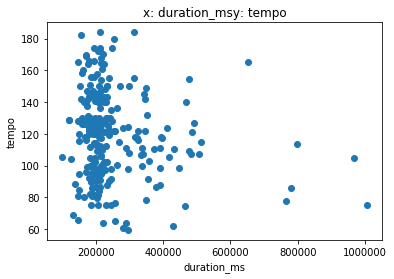

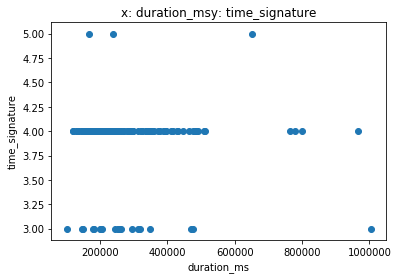

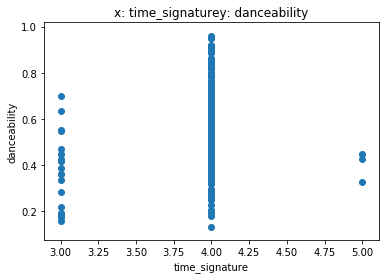

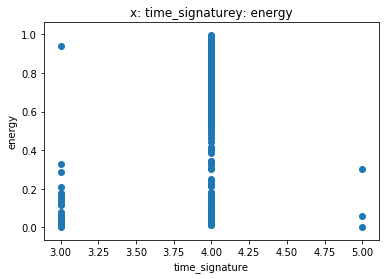

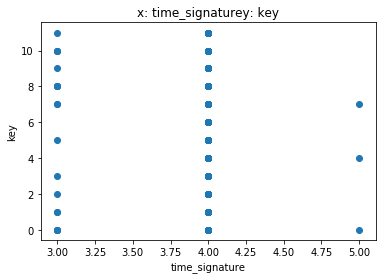

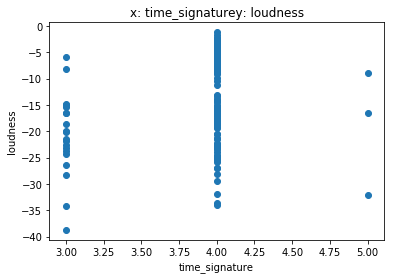

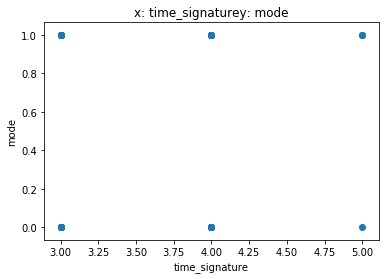

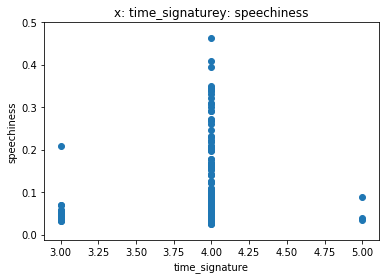

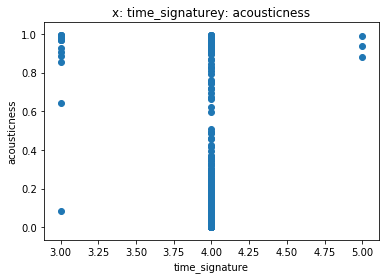

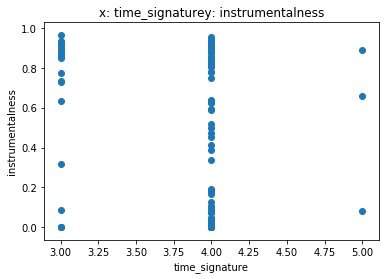

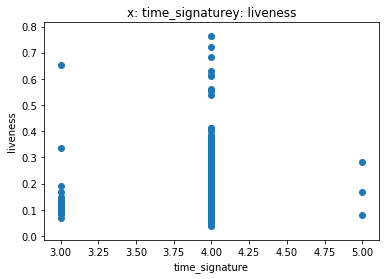

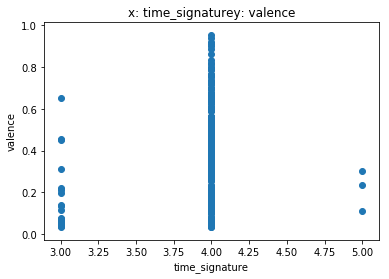

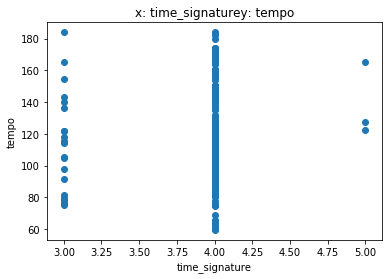

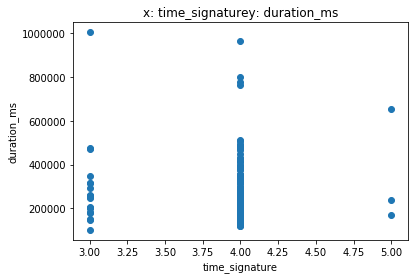

In [18]:
import matplotlib.pyplot as plt
def draw_feature_comparison():    
    for feature_index in range(len(attribute_names)):
        for feature_index2 in range(len(attribute_names)):
            if feature_index == feature_index2:
                continue
                # don't need to compare with itself
            plt.scatter(x[:, feature_index], x[:, feature_index2])
            plt.xlabel(attribute_names[feature_index])
            plt.ylabel(attribute_names[feature_index2])
            
            title = "x: " + attribute_names[feature_index] + " , y: " + attribute_names[feature_index2]
            plt.title(title)
            plt.show()
draw_feature_comparison()

In [19]:
attribute_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

Our observations:
- danceibility and energy: positive correlation
- danceability & valence, kind of spaced out distribution
- loudness & energy: real nice log graph 
- loudness & acoustiness: log graph
- liveness & loudness
- eh danceability and valence?

not that useful feature comparisons
- time signature
- duration_ms
- key
- mode

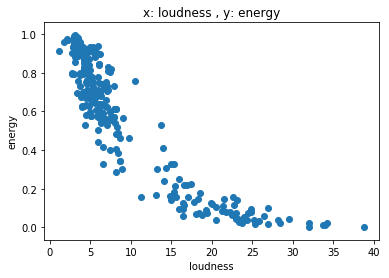

In [38]:
attribute1 = "loudness"
attribute2 = "energy"

index1 = attribute_names.index(attribute1)
index2 = attribute_names.index(attribute2)
# let's go ahead and make loudness positive so we can take the log later
data1 = -x[:, index1]
data2 = x[:, index2]

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , y: " + attribute2
plt.title(title)

plt.scatter(data1, data2)
plt.show()

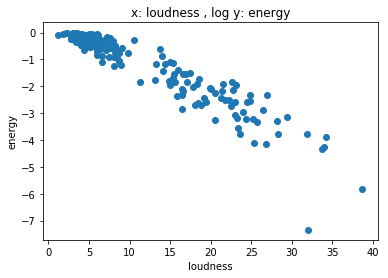

In [94]:
log_data1 = np.log(data1)
log_data2 = np.log(data2) 

log_data1 = np.reshape(log_data1, (-1, 1))
log_data2 = np.reshape(log_data2, (-1, 1))

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , log y: " + attribute2
plt.title(title)

plt.scatter(data1, log_data2)
plt.show()

In [54]:
def normalizer(x):
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]  
    return (x - x_means)/x_stds
# to do:
# what kind of log model is this?
# a + b*log(c* x)
def model(x, w):
    return w[0] + w[1]*np.log(np.dot(x.T, w[2]))

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

In [90]:
x = np.array([data1])
y = np.array([data2])

cost_histories = []
labels = []

w = 0.1 * np.random.randn(3, 1)
max_its = 100
alpha = 10**(-1)

weights, costs = gradient_descent(least_squares,alpha,max_its,w)
cost_histories.append(costs)
labels.append("original")

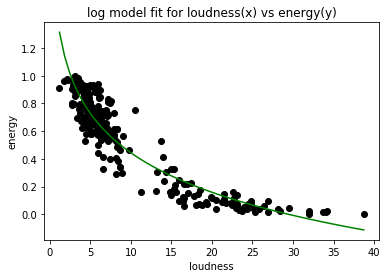

[[ 0.53402217]
 [-0.41151493]
 [ 0.12449455]]
model: 0.5340221685375643 + -0.4115149288551763*np.log(x*0.12449454645548094))


In [105]:
tuned_weight = weights[max_its]

plt.scatter(x, y, color = "black")

line_x = np.linspace(np.amin(x), np.amax(x), 60)
line_y = [model(np.array([x_val]), tuned_weight) for x_val in line_x]

plt.plot(line_x, line_y, color = "g")
plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.title("log model fit for loudness(x) vs energy(y)")
plt.show()
print(tuned_weight)
print("model: {0} + {1}*np.log(x*{2}))".format(tuned_weight[0, 0], tuned_weight[1, 0], tuned_weight[2, 0]))

To do:
- insert model + prediction
- just use sklearn instead to find models - would be faster

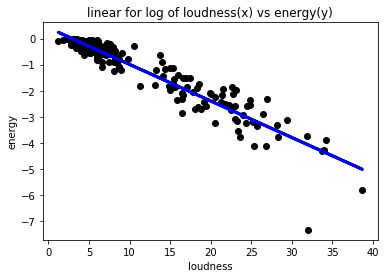

linear model: -0.14042385171479035*x + 0.4143374788332038


In [109]:
import matplotlib.pyplot as plt
from sklearn import linear_model
lm = linear_model.LinearRegression()

#logx = [np.log(value) for value in data1]
logy = [np.log(value) for value in data2]

#logx = np.reshape(logx, (-1, 1))
data1 = np.reshape(data1, (-1, 1))
logy = np.reshape(logy, (-1, 1))

lm.fit(data1, logy)
logy_predictions = lm.predict(data1)
plt.scatter(data1, logy,  color='black')
plt.plot(data1, logy_predictions, color='blue', linewidth=3)
plt.title("linear for log of loudness(x) vs energy(y)")

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.show()


intercept = lm.intercept_[0]
slope = lm.coef_[0][0]

print("linear model: {0}*x + {1}".format(slope,intercept))